# Analisis Exploratorio
---
Deberán realizar 5 visualizaciones interesantes que ayuden a explicar el target haciendo almenos un plot de cada uno de los siguientes tipos:

* Bar plot (o stacked bar plot o variaciones)
* Violin plot
* Box plot
* Heatmap

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hongos = pd.read_csv('data/secondary_data.csv', sep=';')
hongos

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [3]:
hongos.count()

class                   61069
cap-diameter            61069
cap-shape               61069
cap-surface             46949
cap-color               61069
does-bruise-or-bleed    61069
gill-attachment         51185
gill-spacing            36006
gill-color              61069
stem-height             61069
stem-width              61069
stem-root                9531
stem-surface            22945
stem-color              61069
veil-type                3177
veil-color               7413
has-ring                61069
ring-type               58598
spore-print-color        6354
habitat                 61069
season                  61069
dtype: int64

In [4]:
hongos.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [5]:
df = hongos.copy()
df.rename(columns={'class':'clase'}, inplace=True)

colores = {
    'n':'marrón',
    'b':'amarillento',
    'g':'gris',
    'r':'verde',
    'p':'rosa',
	'u':'violeta',
    'e':'rojo',
    'w':'blanco',
    'y':'amarillo',
    'l':'azul',
	'o':'naranja',
    'k':'negro',
}

formas = {
    'b':'campana',
    'c':'cono',
    'x':'convexo',
    'f':'plano',
    's':'hundido',
    'p':'esfera',
    'o':'otro',
}

estaciones = {
    'u':'Verano',
    'a':'Otoño',
    'w':'Invierno',
    's':'Primavera',
}

anillos = {
    'c':'telaraña',
    'e':'evanescente',
    'r':'resplandeciente',
    'g':'estriado',
	'l':'largo',
    'p':'colgante',
    's':'revastecidos',
    'z':'zoneados',
    'y':'escamoso',
    'm':'movible',
    'f':'ninguno',
    '?':'desconocido',
}

df.clase = df.clase.map(lambda x: {'p':'venenoso','e':'comestible'}.get(x, None))
df['cap-shape'] = df['cap-shape'].map(lambda x: formas.get(x, None))
df.season = df.season.map(lambda x: estaciones.get(x, None))
df['ring-type'] = df['ring-type'].map(lambda x: anillos.get(x, None))

for col in df.columns:
    if 'color' in col:
        df[col] = df[col].map(lambda x: colores.get(x, None))

In [6]:
colores = sns.color_palette('Set2')
colores[0], colores[1] = colores[1], colores[0]
colores

[(0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

## Pie Chart

Text(0.5, 1.0, 'Distribución del label en los datos.')

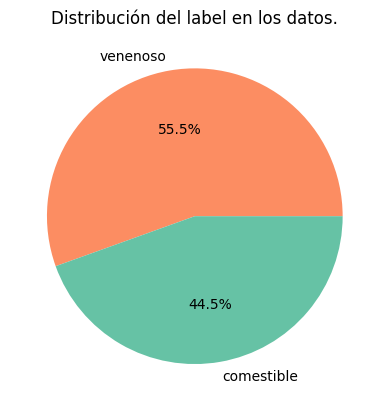

In [7]:
plt.figure(dpi=100)
plt.pie(df.clase.value_counts(), labels=df.clase.value_counts().index, autopct='%1.1f%%', colors=colores)
plt.title('Distribución del label en los datos.')

## Bar Plot

Text(0, 0.5, 'Alto del tallo (cm)')

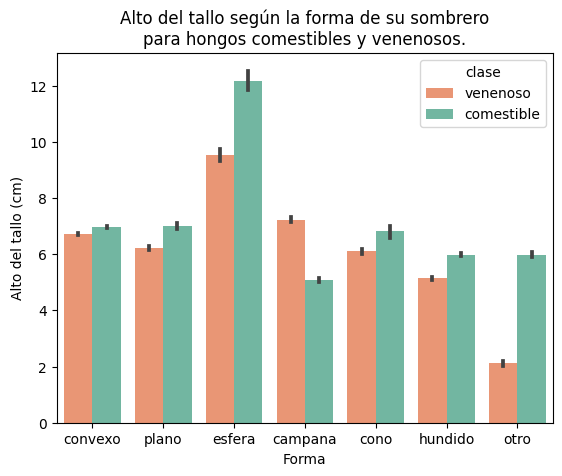

In [8]:
plt.figure(dpi=100)
sns.barplot(df, x='cap-shape', y='stem-height', hue='clase', palette=colores)
plt.title('Alto del tallo según la forma de su sombrero\npara hongos comestibles y venenosos.')
plt.xlabel('Forma')
plt.ylabel('Alto del tallo (cm)')

## Box Plot

Text(0, 0.5, 'Ancho del tallo (cm)')

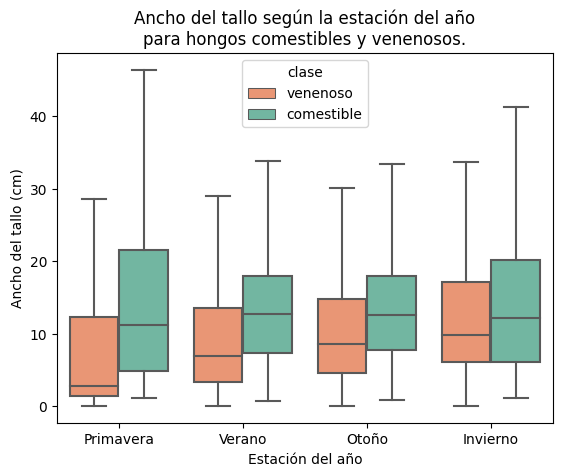

In [9]:
plt.figure(dpi=100)
sns.boxplot(df, x='season', y='stem-width', palette=colores, hue='clase', showfliers=False, order=['Primavera', 'Verano', 'Otoño', 'Invierno'])
plt.title('Ancho del tallo según la estación del año\npara hongos comestibles y venenosos.')
plt.xlabel('Estación del año')
plt.ylabel('Ancho del tallo (cm)')

## Violin Plot

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'estriado'),
  Text(1, 0, 'colgante'),
  Text(2, 0, 'evanescente'),
  Text(3, 0, 'largo'),
  Text(4, 0, 'ninguno'),
  Text(5, 0, 'movible'),
  Text(6, 0, 'resplandeciente'),
  Text(7, 0, 'zoneados')])

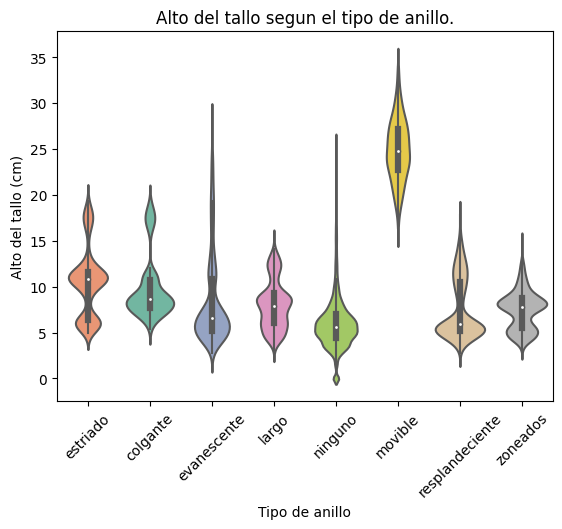

In [14]:
plt.figure(dpi=100)
sns.violinplot(df, x='ring-type', y='stem-height', palette=colores, showfliers=False)
plt.title('Alto del tallo segun el tipo de anillo.')
plt.xlabel('Tipo de anillo')
plt.ylabel('Alto del tallo (cm)')
plt.xticks(rotation=45)

## Heatmap

Text(50.72222222222221, 0.5, 'Color del sombrero')

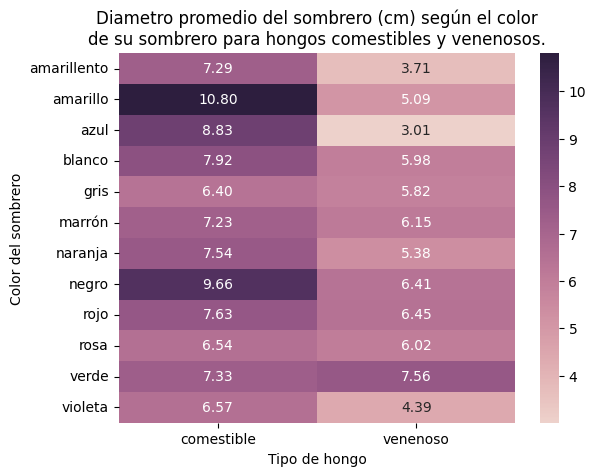

In [11]:
plt.figure(dpi=100)
sns.heatmap(df.pivot_table(index='cap-color', columns='clase', values='cap-diameter', aggfunc='mean'), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, fmt='.2f')
plt.title('Diametro promedio del sombrero (cm) según el color\nde su sombrero para hongos comestibles y venenosos.')
plt.xlabel('Tipo de hongo')
plt.ylabel('Color del sombrero')

## Scatter Plot

/tmp/ipykernel_2026/1282455793.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(df, x='stem-width', y='stem-height', hue='clase', palette=colores)


Text(0, 0.5, 'Altura del tallo (cm)')

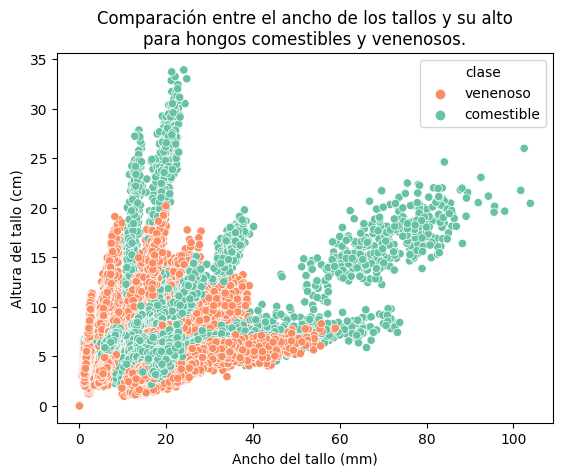

In [12]:
plt.figure(dpi=100)
sns.scatterplot(df, x='stem-width', y='stem-height', hue='clase', palette=colores)
plt.title('Comparación entre el ancho de los tallos y su alto\npara hongos comestibles y venenosos.')
plt.xlabel('Ancho del tallo (mm)')
plt.ylabel('Altura del tallo (cm)')